***LIBRARIES***

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples,davies_bouldin_score
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

***EDA&PREPROCESSING***

In [4]:
data=pd.read_csv('Mall_Customers.csv')
df=data.copy()

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

CustomerID        0
Genre             0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [10]:
list=df.columns


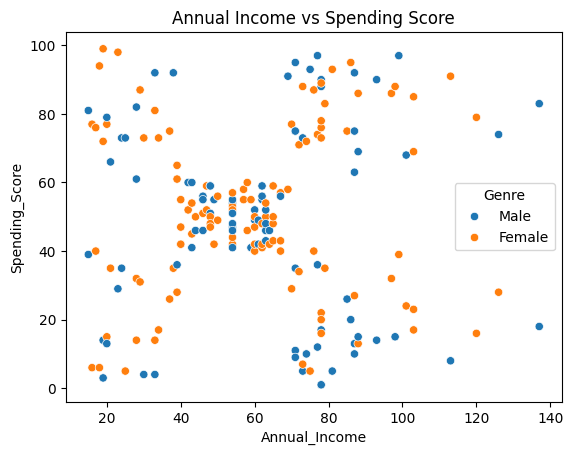

In [11]:
sns.scatterplot(data=df,x='Annual_Income',y='Spending_Score',hue='Genre')
plt.title('Annual Income vs Spending Score')
plt.show()

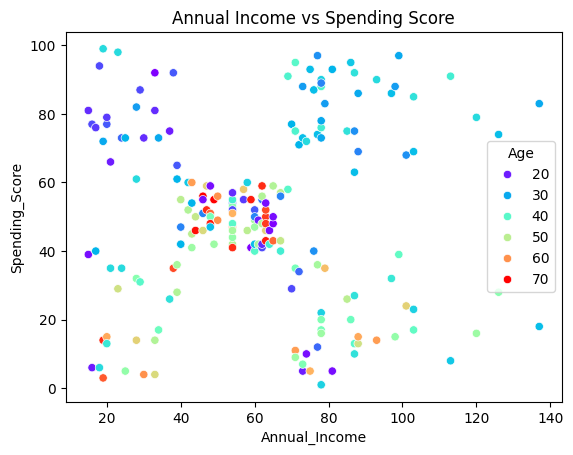

In [12]:
sns.scatterplot(data=df,x='Annual_Income',y='Spending_Score',hue='Age',palette='rainbow')
plt.title('Annual Income vs Spending Score')
plt.show()

In [13]:
df.drop('CustomerID',axis=1,inplace=True)

Age                  Axes(0.125,0.11;0.227941x0.77)
Annual_Income     Axes(0.398529,0.11;0.227941x0.77)
Spending_Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

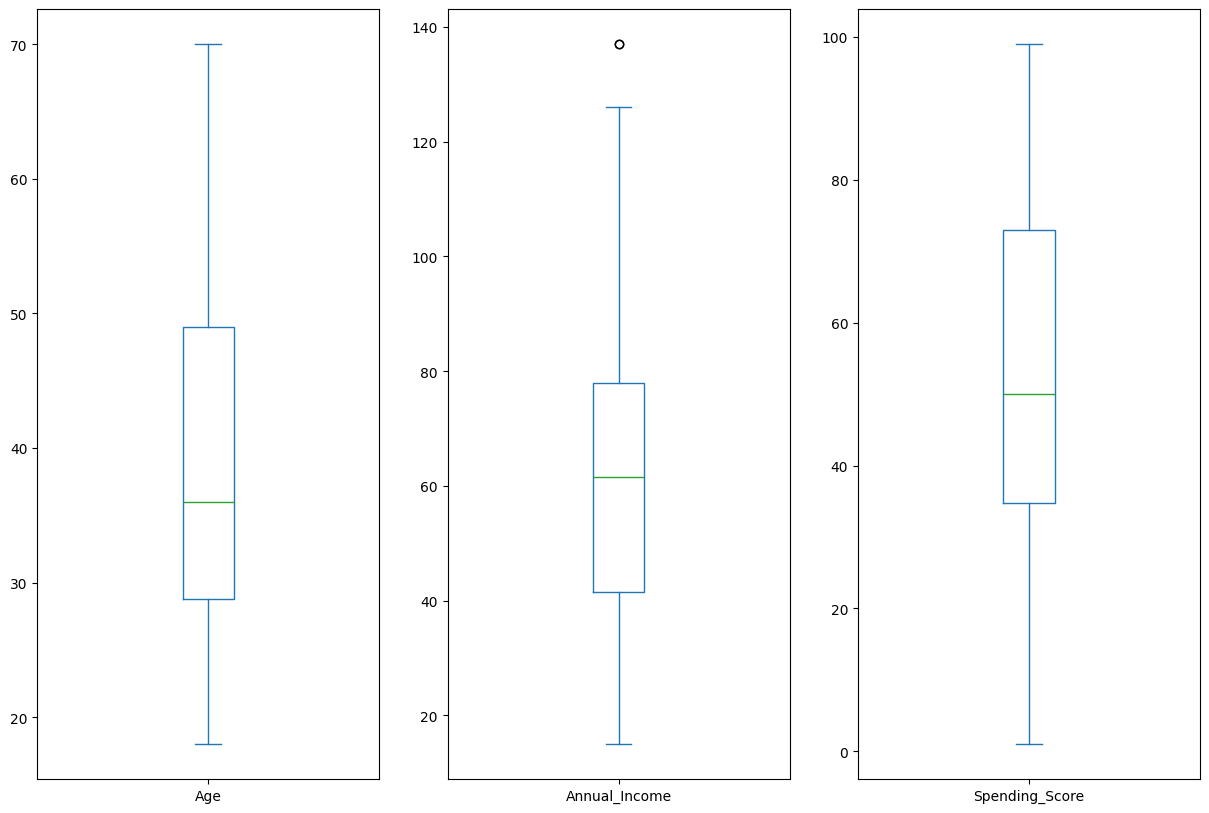

In [14]:
df.plot(kind='box',subplots=True,figsize=(15,10))

In [15]:
df.replace({'Female':0,'Male':1},inplace=True)

In [16]:
df.head()

,Genre,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
X=df.iloc[:,[-2,-1]]

In [18]:
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [19]:
X_scaled.head()

,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Optimal K: 5


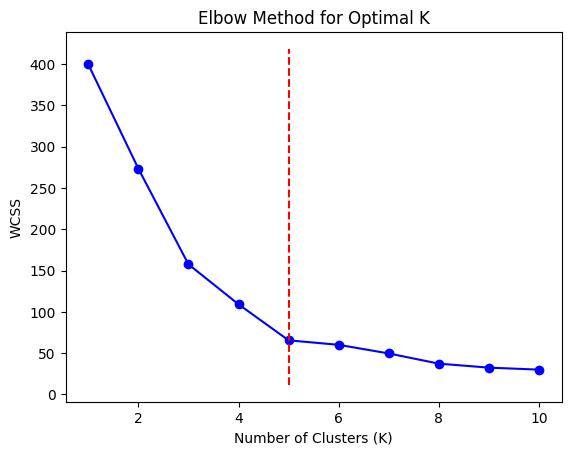

In [20]:
wcss = []
K_values = range(1, 11)
for k in K_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
kl = KneeLocator(K_values, wcss, curve="convex", direction="decreasing")
print("Optimal K:", kl.knee)
plt.plot(K_values, wcss, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.show()

***MODELING***

In [21]:
km=KMeans(n_clusters=5,random_state=42,init="k-means++")
y_pred=km.fit_predict(X_scaled)


In [22]:
df["Cluster"]=y_pred

In [23]:
df['Cluster']

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

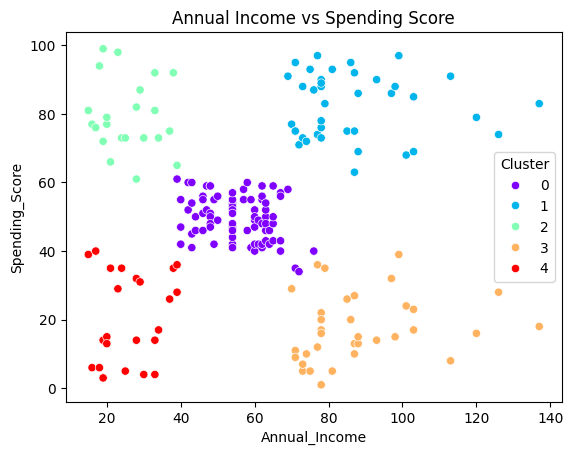

In [24]:
sns.scatterplot(data=df,x='Annual_Income',y='Spending_Score',hue='Cluster',palette='rainbow')
plt.title('Annual Income vs Spending Score')
plt.show()

In [25]:
score=silhouette_score(X_scaled,y_pred)
print("Silhouette Score:",score)


Silhouette Score: 0.5546571631111091


In [26]:
param_grid = [
    (0.3, 3),
    (0.3, 5),
    (0.5, 4),
    (0.6, 5),
    (0.8, 5),
    (.5,3),
    (.5,4),
    (.5,5),
    (.6,3),
    (.6,4),
    (.6,5),
    (.7,3),
    (.7,4),
    (.7,5),
    (12,7)
]

for eps, min_samples in param_grid:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = labels.tolist().count(-1)

    print(f"eps={eps}, min_samples={min_samples} => Clusters: {n_clusters}, Noise points: {n_noise})")

eps=0.3, min_samples=3 => Clusters: 9, Noise points: 14)
eps=0.3, min_samples=5 => Clusters: 7, Noise points: 35)
eps=0.5, min_samples=4 => Clusters: 2, Noise points: 8)
eps=0.6, min_samples=5 => Clusters: 1, Noise points: 5)
eps=0.8, min_samples=5 => Clusters: 1, Noise points: 0)
eps=0.5, min_samples=3 => Clusters: 2, Noise points: 7)
eps=0.5, min_samples=4 => Clusters: 2, Noise points: 8)
eps=0.5, min_samples=5 => Clusters: 2, Noise points: 8)
eps=0.6, min_samples=3 => Clusters: 1, Noise points: 0)
eps=0.6, min_samples=4 => Clusters: 1, Noise points: 5)
eps=0.6, min_samples=5 => Clusters: 1, Noise points: 5)
eps=0.7, min_samples=3 => Clusters: 1, Noise points: 0)
eps=0.7, min_samples=4 => Clusters: 1, Noise points: 0)
eps=0.7, min_samples=5 => Clusters: 1, Noise points: 0)
eps=12, min_samples=7 => Clusters: 1, Noise points: 0)


In [27]:
dbs=DBSCAN(eps=.5,min_samples=3,metric='euclidean')
dbs.fit(X_scaled)

,eps,0.5
,min_samples,3
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [28]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1, -1,  1, -1, -1, -1, -1, -1, -1])

In [29]:
df['dbs_cluster']=dbs.labels_

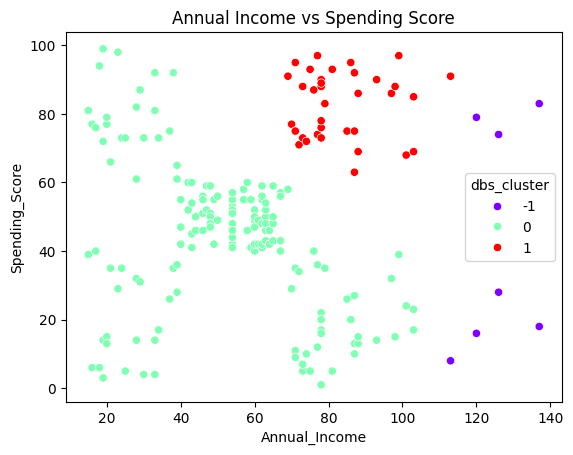

In [30]:
sns.scatterplot(data=df,x='Annual_Income',y='Spending_Score',hue='dbs_cluster',palette='rainbow')
plt.title('Annual Income vs Spending Score')
plt.show()

In [31]:
scoredbs=silhouette_score(X_scaled,dbs.labels_)
print("Silhouette Score:",scoredbs)

Silhouette Score: 0.3566017629129311


Average Spending Score per Cluster:
Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending_Score, dtype: float64


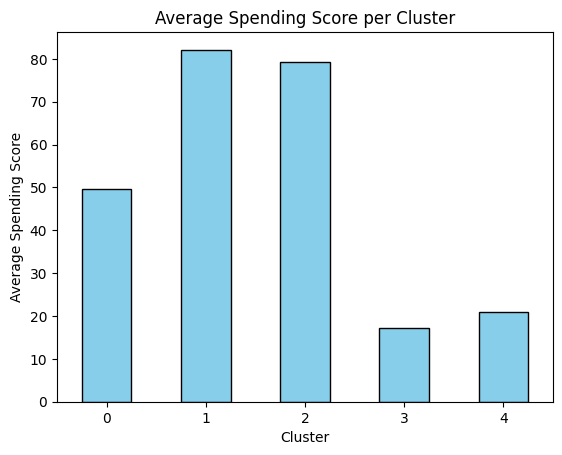

In [32]:
cluster_avg_spending = df.groupby("Cluster")["Spending_Score"].mean()

print("Average Spending Score per Cluster:")
print(cluster_avg_spending)
cluster_avg_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Spending Score per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)
plt.show()

Average Spending Score per Cluster:
dbs_cluster
-1    43.714286
 0    43.101911
 1    82.416667
Name: Spending_Score, dtype: float64


(array([0, 1, 2]), [Text(0, 0, '-1'), Text(1, 0, '0'), Text(2, 0, '1')])

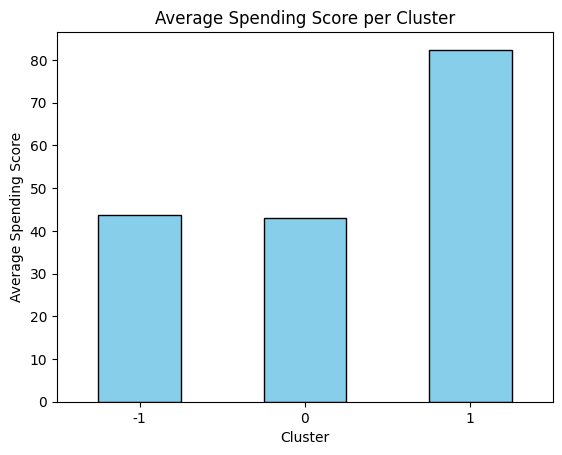

In [33]:
dbs_cluster_avg_spending = df.groupby("dbs_cluster")["Spending_Score"].mean()

print("Average Spending Score per Cluster:")
print(dbs_cluster_avg_spending)
dbs_cluster_avg_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Spending Score per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)

In [35]:
labels_kms=df['Cluster']
labels_dbs=df['dbs_cluster']
score_kms = silhouette_score(X_scaled, labels_kms)
score_dbs = silhouette_score(X_scaled, labels_dbs) if len(set(labels_dbs)) > 1 else np.nan
comparison_table = pd.DataFrame({
    'Method': ['K-Means',  'DBSCAN'],
    'Number of Clusters': [
        len(np.unique(labels_kms)),

        len(set(labels_dbs)) - (1 if -1 in labels_dbs else 0),

    ],
    'Silhouette Score': [score_kms, score_dbs]

})


In [36]:
print(comparison_table)

    Method  Number of Clusters  Silhouette Score
0  K-Means                   5          0.554657
1   DBSCAN                   3          0.356602
